Weight vector is: [-9.66589  8.7645 ]
The error in case of training dataset is 0.0
The error in case of test dataset is 0.021739130434782608


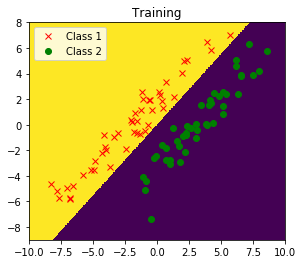

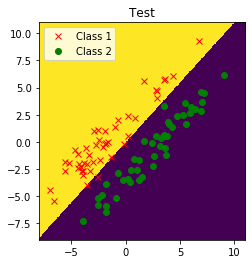

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def plotDecBoundaries(training, label_train,wt,m):

    nclass =  max(np.unique(label_train))
    pred_label=[]
    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.05

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) )
    for i in range(xy.shape[0]):
        if wt@(xy[i][:].T)<=0:
            pred_label.append(0)
        else:
            pred_label.append(1)
    pred_label=np.asarray(pred_label)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F') 
    
    #show the image, give each coordinate a color according to its class label
    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

#     # plot the class training data.

    plt.plot(training[label_train == 1, 0],training[label_train == 1, 1], 'rx')
    plt.plot(training[label_train == 2, 0],training[label_train == 2, 1], 'go')
    plt.title(m)

#     # include legend for training data
    l = plt.legend(('Class 1', 'Class 2'), loc=2)

    
def main():
    Class1Feature1=[] 
    Class1Feature2=[] 
    Class2Feature1=[] 
    Class2Feature2=[] 
    Class1Feature1T=[] 
    Class1Feature2T=[] 
    Class2Feature1T=[] 
    Class2Feature2T=[]
    ClassLabel=[] 
    dt=[]
    g11,g12,g22,g21=[],[],[],[]
    w=np.array([0.1,0.1])
    temp=w
    error,error1=0,0
#     #Reading csv files 
    data = np.genfromtxt('feature_train.csv', dtype=float, delimiter=',')
    dataT = np.genfromtxt('feature_test.csv', dtype=float, delimiter=',')
    dataTLabel = np.genfromtxt('label_test.csv', dtype=float, delimiter=',')
    dataLabel=np.genfromtxt('label_train.csv',dtype=float, delimiter=',') 
     #Extracting Class Labels 
    for i in range(0,92): 
        ClassLabel.append(dataLabel[i]) 
        dt.append(data[i][0])
        dt.append(data[i][1])
        if dataTLabel[i]==1:
            Class1Feature1T.append(dataT[i][0]) 
            Class1Feature2T.append(dataT[i][1])
        if dataTLabel[i]==2:
            Class2Feature1T.append(dataT[i][0]) 
            Class2Feature2T.append(dataT[i][1])
    Class1Feature1T=np.asarray(Class1Feature1T) 
    Class1Feature2T=np.asarray(Class1Feature2T) 
    Class2Feature1T=np.asarray(Class2Feature1T)
    Class2Feature2T=np.asarray(Class2Feature2T)
#     #Extracting Features of 3 Classes 
    for i in range(0,46): 
        Class1Feature1.append(data[i][0]) 
        Class1Feature2.append(data[i][1]) 
        
    for y in range(46,92): 
        Class2Feature1.append(data[y][0]) 
        Class2Feature2.append(data[y][1]) 
      
    Class1Feature1=np.asarray(Class1Feature1) 
    Class1Feature2=np.asarray(Class1Feature2) 
    Class2Feature1=np.asarray(Class2Feature1) 
    Class2Feature2=np.asarray(Class2Feature2)
    ClassLabel=np.asarray(ClassLabel) 
    dt=np.asarray(dt).reshape([92,2])
    g11=np.random.permutation(Class1Feature1)
    g21=np.random.permutation(Class2Feature1)
    for i in range(46):
        for j in range(46):
            if g11[i]==Class1Feature1[j]:
                g12.append(Class1Feature2[j])
        
            if g21[i]==Class2Feature1[j]:
                g22.append(Class2Feature2[j])
    g12=np.asarray(g12)
    g22=np.asarray(g22)
    
    #Defining class 2 data points to have negative g(x)
    g21=-1*g21
    g22=-1*g22
    dt1=np.stack((g11,g12),axis=-1)
    dt2=np.stack((g21,g22),axis=-1)
    dt1T=np.stack((Class1Feature1T,Class1Feature2T),axis=-1)
    dt2T=np.stack((Class2Feature1T,Class2Feature2T),axis=-1)
    dtT=np.vstack((dt1T,dt2T))

    while True:  
        for i in range(0,46):
            if w.T@dt1[i][:]<=0:
                w=w+dt1[i][:]
            if w.T@dt2[i][:]<=0:
                w=w+dt2[i][:]
                
            
        if (temp==w).all():
            break
        else:
            temp=w
    print('Weight vector is:',w)
    
    for i in range(46):
        if w.T@dt[i][:]<0:
            error=error+1
        if w.T@dt[i+46][:]>0:
            error=error+1
        if w.T@dtT[i][:]<0:
            error1=error1+1
        if w.T@dtT[i+46][:]>0:
            error1=error1+1
        
    print('The error in case of training dataset is {}'.format(error/92))
    print('The error in case of test dataset is {}'.format(error1/92))
    plt.figure(1)
    plotDecBoundaries(dt,ClassLabel,w,'Training')
    plt.figure(2)
    plotDecBoundaries(dtT,ClassLabel,w,'Test')


if __name__=='__main__':
    main()

